In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

from loldle_solver.solver import Solver, calc_entropy


sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 4)

In [10]:
def plot_outcomes_dist(champion, outcomes):
    values, counts = np.unique(outcomes, return_counts=True, axis=0)
    counts = counts / counts.sum()

    sort_idx = np.argsort(-counts)
    values = values[sort_idx]
    encoded_values = np.arange(len(values))
    counts = counts[sort_idx]

    entropy = calc_entropy(counts)

    sns.barplot(x=encoded_values, y=counts)
    plt.title(f"{champion} Distribution (Entropy: {entropy:.2f})")
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.xticks(visible=False)
    plt.show()

In [11]:
solver = Solver(compare_release=False)

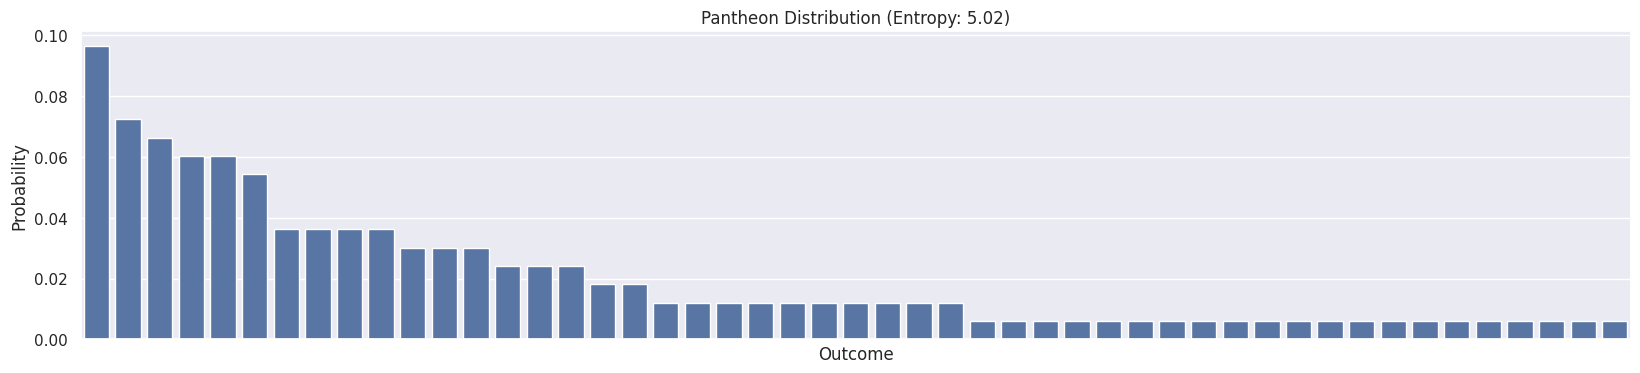

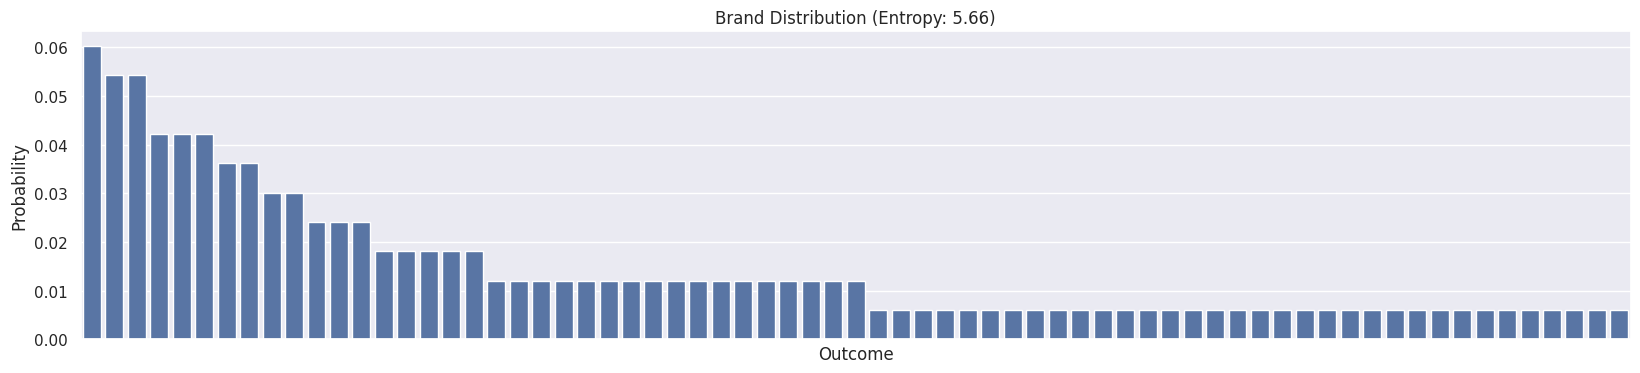

In [12]:
champion = "Pantheon"
outcomes, _ = solver.get_champion_outcomes(champion)
plot_outcomes_dist(champion, outcomes)
champion = "Brand"
outcomes, outcomes_dict = solver.get_champion_outcomes(champion)
plot_outcomes_dist(champion, outcomes)

In [13]:
# 3**7 as in 3 possible outcomes (0, 0.5 and 1) and 7 variables
n_possibilities = 2**3 * 3**4
max_entropy = calc_entropy(n_possibilities * [1 / n_possibilities])
print(f"Max entropy possible: {max_entropy:.2f}")

Max entropy possible: 9.34


In [14]:
entropies = {}

for champion in tqdm(solver.df["name"]):
    entropies[champion] = solver.get_champion_entropy(champion)

entropies = {
    k: v
    for k, v in sorted(
        entropies.items(),
        key=lambda item: item[1],
        reverse=True,
    )
}

  0%|          | 0/166 [00:00<?, ?it/s]

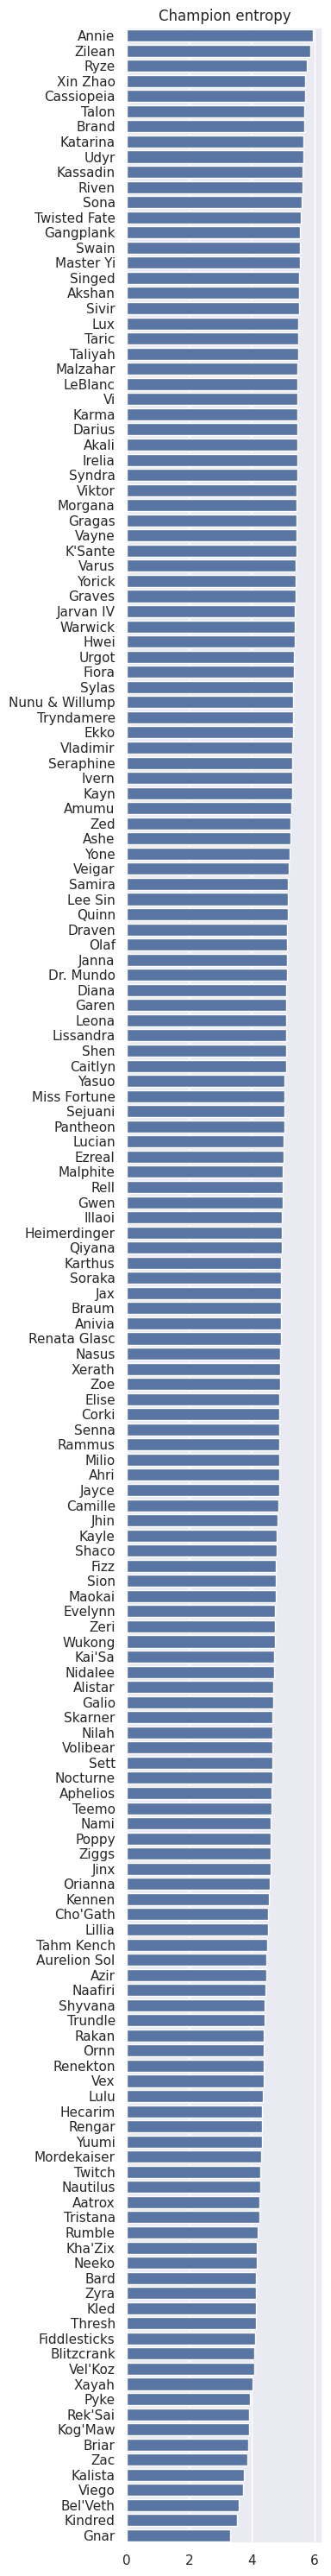

In [15]:
_, ax = plt.subplots(figsize=(4, 30))
sns.barplot(x=entropies.values(), y=entropies.keys(), ax=ax)
plt.title("Champion entropy")
plt.tight_layout()
plt.show()